In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('amazon_alexa.tsv', delimiter = '\t', quoting = 3)

data.shape

(3150, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [6]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [7]:
data.tail()

,rating,date,variation,verified_reviews,feedback
3145,5,30-Jul-18,Black Dot,"""Perfect for kids, adults and everyone in betw...",1
3146,5,30-Jul-18,Black Dot,"""Listening to music, searching locations, chec...",1
3147,5,30-Jul-18,Black Dot,"""I do love these things, i have them running m...",1
3148,5,30-Jul-18,White Dot,"""Only complaint I have is that the sound quali...",1
3149,4,29-Jul-18,Black Dot,Good,1


In [8]:
data.isnull().any()

rating              False
date                False
variation           False
verified_reviews     True
feedback            False
dtype: bool

In [11]:
data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [18]:
data['length'] = data['verified_reviews'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)

data.shape


(3150, 6)

In [19]:
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [20]:
data.groupby('rating').describe()

feedback                                     length              \
          count mean  std  min  25%  50%  75%  max   count        mean   
rating                                                                   
1         161.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   161.0  195.658385   
2          96.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    96.0  249.979167   
3         152.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   152.0  208.098684   
4         455.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   455.0  179.338462   
5        2286.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  2286.0  109.006562   

                                                       
               std  min    25%    50%     75%     max  
rating                                                 
1       212.928219  1.0  36.00  120.0  284.00  1126.0  
2       270.218118  0.0  78.75  165.0  311.25  1688.0  
3       272.582517  1.0  54.00  131.0  286.00  1956.0  
4       216.415268  1.0  34.50  100.0  242.00  1362.0  
5       152.505019  1.0  27.00   65.0  136.00  2853.0

In [21]:
data.groupby('feedback').describe()

rating                                               length  \
           count      mean       std  min  25%  50%  75%  max   count   
feedback                                                                
0          257.0  1.373541  0.484688  1.0  1.0  1.0  2.0  2.0   257.0   
1         2893.0  4.737643  0.546544  3.0  5.0  5.0  5.0  5.0  2893.0   

                                                                   
                mean         std  min   25%    50%    75%     max  
feedback                                                           
0         215.949416  236.909631  0.0  53.0  137.0  291.0  1688.0  
1         125.274456  175.036515  1.0  29.0   70.0  155.0  2853.0

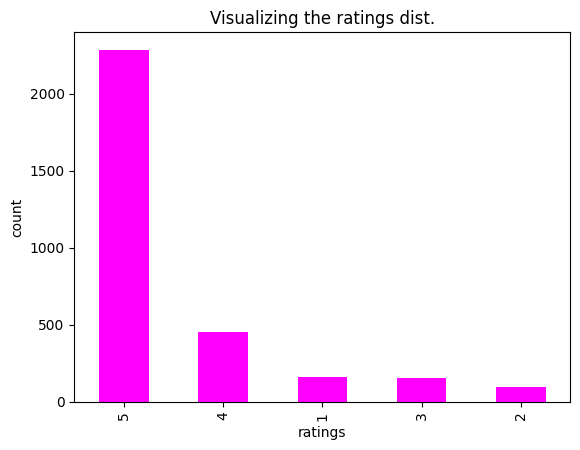

In [22]:
data['rating'].value_counts().plot.bar(color = 'magenta')
plt.title('Visualizing the ratings dist.')
plt.xlabel('ratings')
plt.ylabel('count')
plt.show()

In [23]:
data['rating'].value_counts()

rating
5    2286
4     455
1     161
3     152
2      96
Name: count, dtype: int64

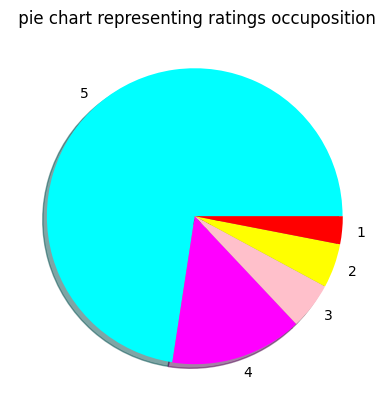

In [24]:
labels = '5', '4', '3', '2', '1'
sizes = [2286, 455, 161, 152, 96]
colors = ['cyan', 'magenta', 'pink', 'yellow', 'red']
explode = [0.001, 0.001, 0.001, 0.001, 0.001]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True)
plt.title(' pie chart representing ratings occuposition')
plt.show()

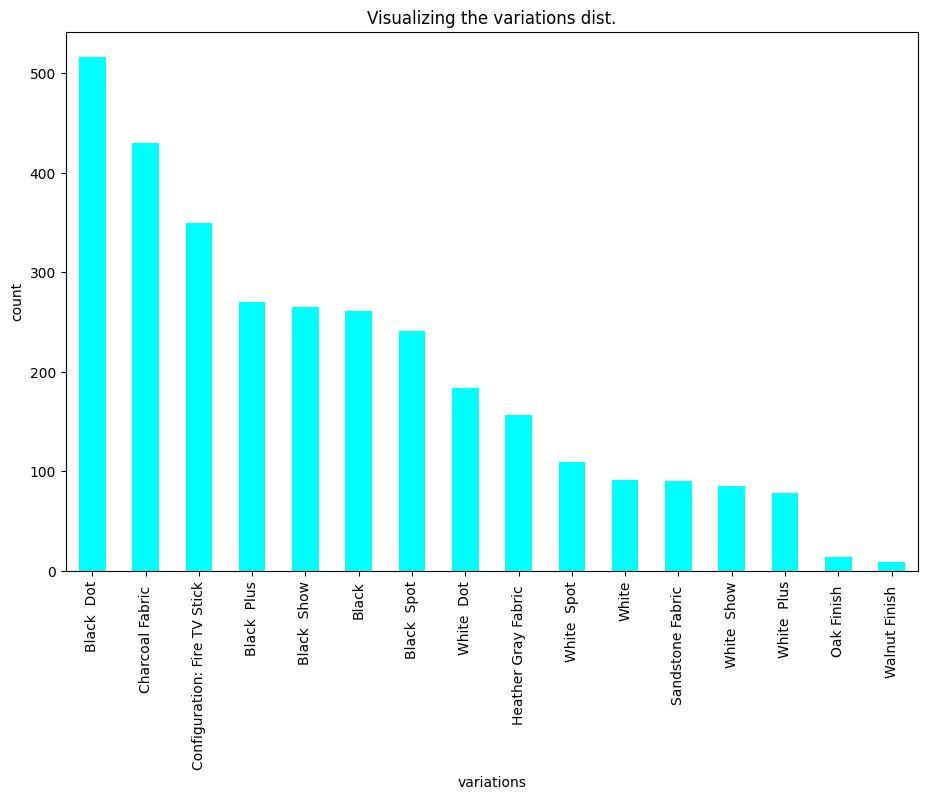

In [25]:
data['variation'].value_counts().plot.bar(color = 'cyan', figsize = (11, 7))
plt.title('Visualizing the variations dist.')
plt.xlabel('variations')
plt.ylabel('count')
plt.show()

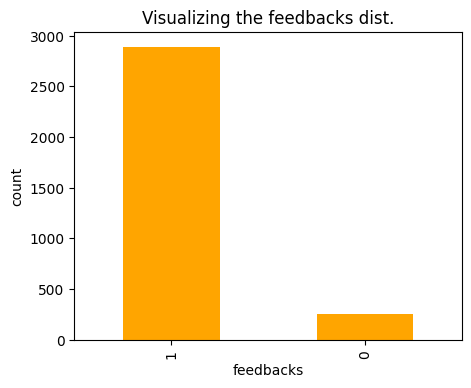

In [26]:
data['feedback'].value_counts().plot.bar(color = 'orange', figsize = (5, 4))
plt.title('Visualizing the feedbacks dist.')
plt.xlabel('feedbacks')
plt.ylabel('count')
plt.show()

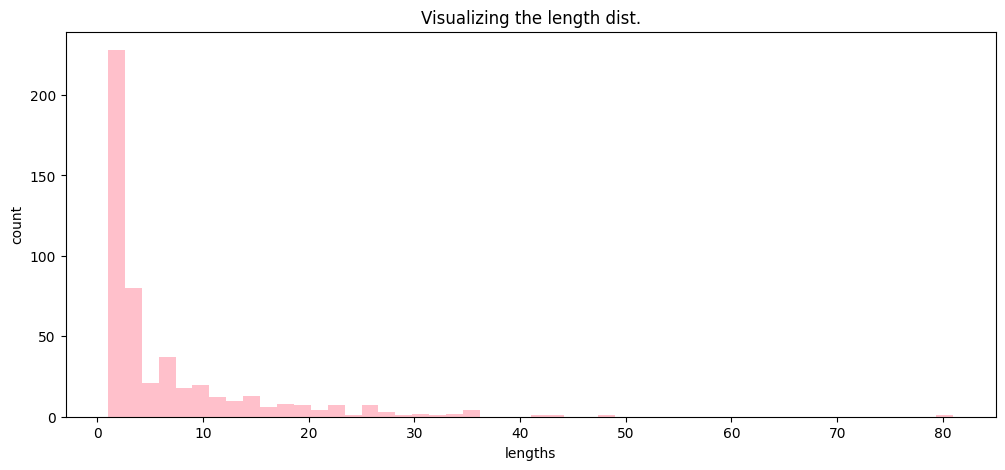

In [27]:
data['length'].value_counts().plot.hist(color = 'pink', figsize = (12, 5), bins = 50)
plt.title('Visualizing the length dist.')
plt.xlabel('lengths')
plt.ylabel('count')
plt.show()

In [28]:
data.length.describe()

count    3150.000000
mean      132.672381
std       182.527862
min         0.000000
25%        30.000000
50%        74.000000
75%       166.000000
max      2853.000000
Name: length, dtype: float64

In [29]:
data[data['length'] == 1]['verified_reviews'].iloc[0]

'😍'

In [30]:
data[data['length'] == 21]['verified_reviews'].iloc[0]

'Good sound works well'

In [31]:
data[data['length'] == 50]['verified_reviews'].iloc[0]

'Yet another Exho for our home and love them all!!!'

In [32]:
data[data['length'] == 2853]['verified_reviews'].iloc[0]

'"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It\'s no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free P

In [33]:
data.date.describe()

count          3150
unique           77
top       30-Jul-18
freq           1603
Name: date, dtype: object

In [34]:
data['date'].value_counts()

date
30-Jul-18    1603
29-Jul-18     482
28-Jul-18     250
26-Jul-18      85
31-Jul-18      81
             ... 
2-Jun-18        2
9-Jun-18        1
29-May-18       1
4-Jun-18        1
13-Jun-18       1
Name: count, Length: 77, dtype: int64

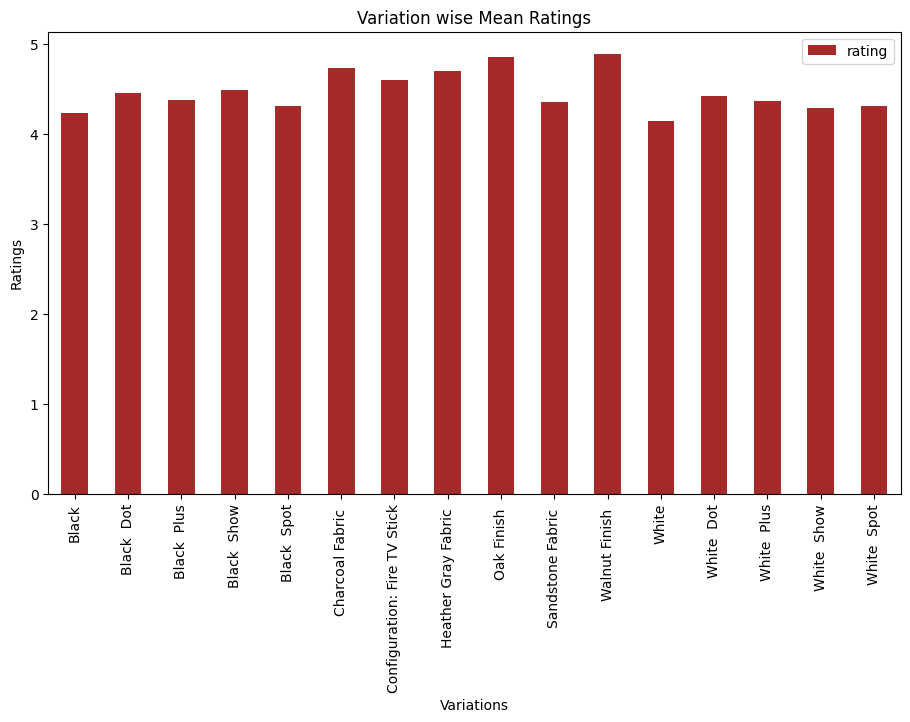

In [45]:
data.groupby('variation')[['rating']].mean().plot.bar(color='brown', figsize=(11, 6))
plt.title("Variation wise Mean Ratings")
plt.xlabel('Variations')
plt.ylabel('Ratings')
plt.show()

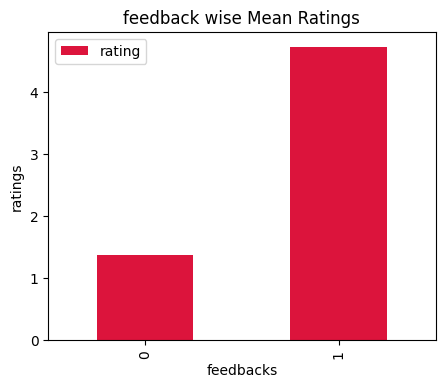

In [46]:
data.groupby('feedback')[['rating']].mean().plot.bar(color = 'crimson', figsize=(5, 4))
plt.title("feedback wise Mean Ratings")
plt.xlabel('feedbacks')
plt.ylabel('ratings')
plt.show()

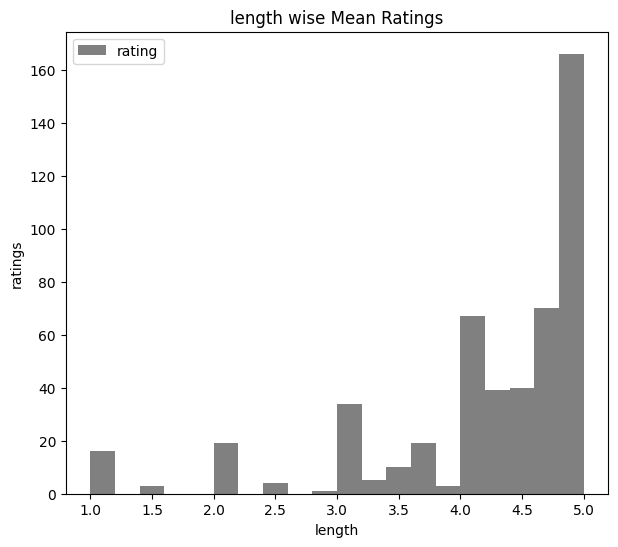

In [56]:
data.groupby('length')[['rating']].mean().plot.hist(color = 'gray', figsize=(7, 6), bins = 20)
plt.title("length wise Mean Ratings")
plt.xlabel('length')
plt.ylabel('ratings')
plt.show()

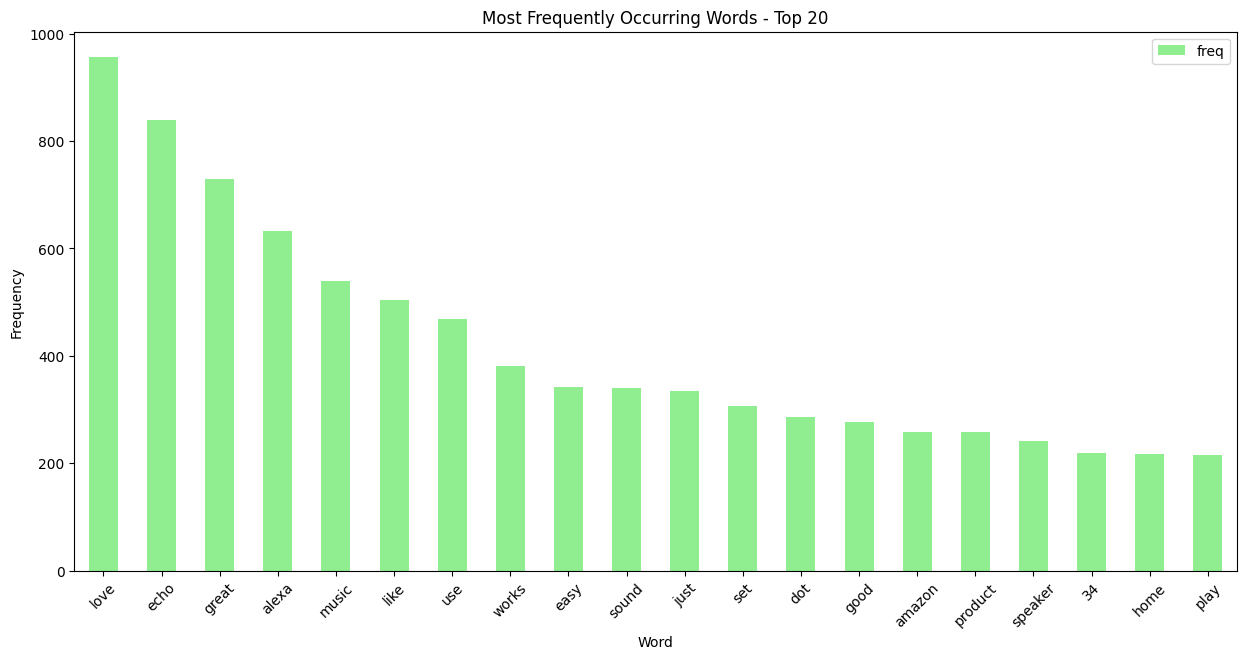

In [58]:
from sklearn.feature_extraction.text import CountVectorizer

# Fill NaN values with an empty string
data['verified_reviews'] = data['verified_reviews'].fillna('')

# Initialize CountVectorizer with stop words set to 'english'
cv = CountVectorizer(stop_words='english')

# Fit and transform the 'verified_reviews' column to get word counts
words = cv.fit_transform(data['verified_reviews'])

# Sum words across all documents
sum_words = words.sum(axis=0)

# Create a list of tuples (word, frequency)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]

# Convert to DataFrame
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

# Sort the DataFrame by frequency in descending order
frequency = frequency.sort_values(by='freq', ascending=False)

# Plot the top 20 most frequent words
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color='lightgreen')
plt.title("Most Frequently Occurring Words - Top 20")
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

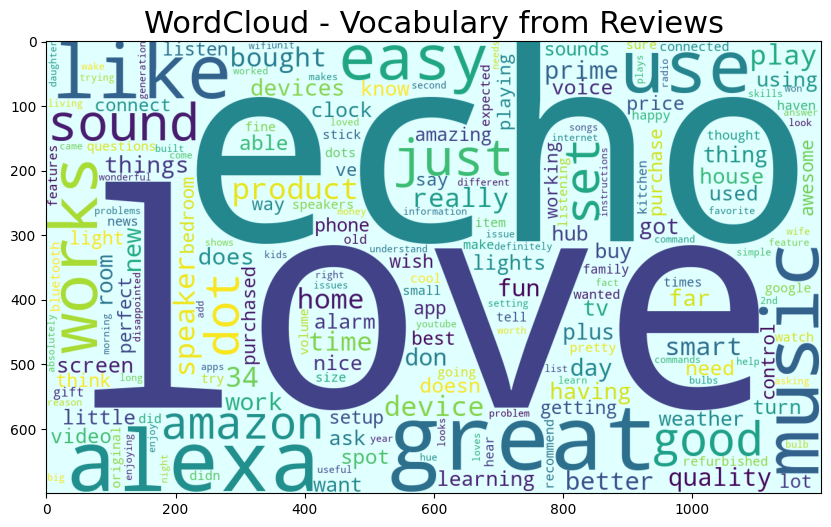

In [63]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'lightcyan', width = 1200, height = 700).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

In [64]:
# cleaning the texts
# importing the libraries for Natural Language Processing

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thang\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [65]:

corpus = []

for i in range(0, 3150):
  review = re.sub('[^a-zA-Z]', ' ', data['verified_reviews'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  review = ' '.join(review)
  corpus.append(review)
 

In [66]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)

x = cv.fit_transform(corpus).toarray()

y = data.iloc[:, 4].values

print(x.shape)
print(y.shape)

(3150, 2500)
(3150,)


In [67]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 15)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2205, 2500)
(2205,)
(945, 2500)
(945,)


In [69]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)


**Random Forest**

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)


Training Accuracy : 0.9941043083900227
Testing Accuracy : 0.9386243386243386
[[ 24  51]
 [  7 863]]


In [71]:
# applying k fold cross validation

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)

print("Accuracy :", accuracies.mean())
print("Standard Variance :", accuracies.std())

Accuracy : 0.9351604278074866
Standard Variance : 0.011924591106822795


In [72]:

params = {
    'bootstrap': [True],
    'max_depth': [80, 100],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 300]
}


In [73]:
# applying grid search with stratified folds

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

cv_object = StratifiedKFold(n_splits = 2)

grid = GridSearchCV(estimator = model, param_grid = params, cv = cv_object, verbose = 0, return_train_score = True)
grid.fit(x_train, y_train.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 100],
                         'min_samples_split': [8, 12],
                         'n_estimators': [100, 300]},
             return_train_score=True)

In [74]:
print("Best Parameter Combination : {}".format(grid.best_params_))

Best Parameter Combination : {'bootstrap': True, 'max_depth': 100, 'min_samples_split': 8, 'n_estimators': 300}


In [76]:
print("Mean Cross Validation Accuracy - Train Set : {}".format(grid.cv_results_['mean_train_score'].mean()*100))
print("Mean Cross Validation Accuracy - Validation Set : {}".format(grid.cv_results_['mean_test_score'].mean()*100))

from sklearn.metrics import accuracy_score
print("Accuracy Score for Test Set :", accuracy_score(y_test, y_pred))



Mean Cross Validation Accuracy - Train Set : 96.89370105947647
Mean Cross Validation Accuracy - Validation Set : 92.21642056888241
Accuracy Score for Test Set : 0.9386243386243386


**Xg Boost Model**

In [81]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

model = XGBClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9700680272108844
Testing Accuracy : 0.9407407407407408
[[ 27  48]
 [  8 862]]


**Decision Forest**

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9941043083900227
Testing Accuracy : 0.9132275132275133
[[ 33  42]
 [ 40 830]]
